<h1>130. Linear Regression: Hyper Parameter 조정</h1> 

- 대표적 Hyper-Parameter 인 Learning Rate 변화에 따른 model performance 의 변화를 시각화

In [2]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [3]:
class Data(Dataset):
    def __init__(self, train=True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        # true function
        self.f = -3 * self.x + 1
        # true function + noise
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
        # train set 에만 outiers 추기
        if train:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
        
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return self.len

- data 를 생성했던 true function 을 line 으로 그리고 training points 를 적색으로 표시.   

- outlier 가 x=-3 과 x=2 부근에 있음

In [4]:
train_data = Data()  # with noise

val_data = Data(train=False)  # No noise

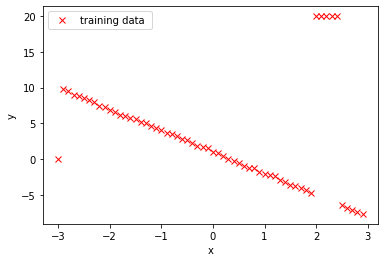

In [5]:
# Plot training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label="training data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2>Linear Regression Model,  Data Loader 및 Criterion Function 생성</h2>

In [9]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [10]:
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=train_data, batch_size=1)

<h2>서로 다른 learning rate 로 train 하고 model 저장</h2>

In [11]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

validation_error = torch.zeros(len(learning_rates))

MODELS = []

<h2>서로 다른 Learnng Rate 에 대해 별도 model 훈련</h2>

다양한 learning rate 를 시도하고, SGD 를 수행하고, 각 모델을 list 에 저장합니다.

In [12]:
ITER = 100

for i, lr in enumerate(learning_rates):
    model = linear_regression(1, 1)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    for epoch in range(ITER):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    print("learning rate = ", lr) 
    #validation data
    Yhat = model(val_data.x)
    val_loss = criterion(Yhat, val_data.y)
    validation_error[i] = val_loss.item()
    print(val_loss.item())
    print()
    
    MODELS.append(model)

learning rate =  0.0001
43.78229904174805
10.874068260192871

learning rate =  0.001
43.03519058227539
13.694378852844238

learning rate =  0.01
43.29603576660156
10.520931243896484

learning rate =  0.1
72.21733093261719
4.881576061248779



In [13]:
print(validation_error)

tensor([43.7823, 43.0352, 43.2960, 72.2173])
tensor([10.8741, 13.6944, 10.5209,  4.8816])


<h2 id="Result">View the Results</h2>  

각 model 에 대해 validation data 로 prediction 을 생성하여 true data 와 비교. 각 learning rate 별로 10 epoch 동안 얼마나 train 되었는지 비교

- Tensor가 기록을 추적하는 것을 중단하게 하려면, .detach() 를 호출하여 연산 기록으로부터 분리(detach)하여 이후 연산들이 추적되는 것을 방지할 수 있다.|

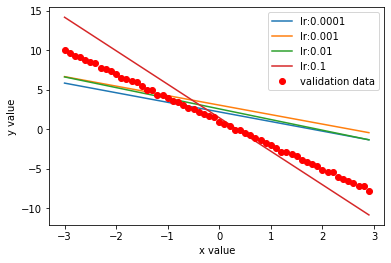

In [15]:
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label='lr:' + str(learning_rate))

plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'ro', label="validation data")
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()